# Flowers: Compression of images 

https://www.kaggle.com/datasets/l3llff/flowers

# Open the images from the folders

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
from PIL import Image

# The function to compress using SVD

In [2]:
def compress_image(input_image, ratio):
    img = Image.open(input_image)
    img_array = np.asarray(img)
    
    channels_matrix = np.zeros_like(img_array)  #aqui guardo mi im0 1 y 2
    for i in range(0,3):
        img_channels = img_array[:,:,i]
        u, sigma, v = np.linalg.svd(img_channels)
        s = np.diag(sigma)
        
        k = int(ratio * np.shape(s)[0])
        #print(k)
        
        u = u[:, :k]
        s = s[0:k, :k]
        v = v[:k, :]
        channels_matrix[:,:,i] = u @ s @ v #guardo el svd de cada canal
        
    compressed = np.dstack((channels_matrix[:,:,0], channels_matrix[:,:,1], channels_matrix[:,:,2]))
    compressed = compressed.astype(np.uint8)
    
    new_img = Image.fromarray(compressed)
    n_per=str(ratio)
    n="_compress_"+n_per+".jpg"
    new_img.save(input_image[:-4]+n)

In [8]:
compress_image('gato.jpg', 0.01)

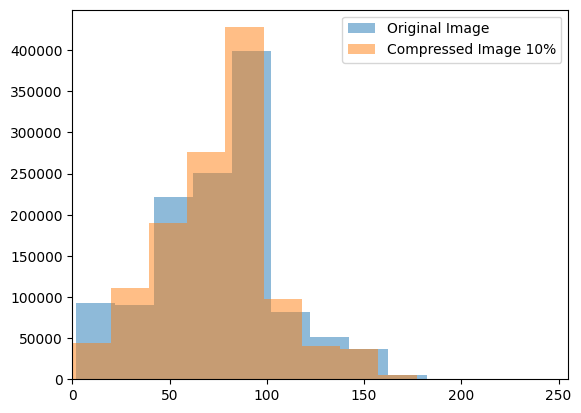

In [9]:
im1 = cv2.imread('gato.jpg')
im2 = cv2.imread('gato_compress_0.01.jpg')
# calculate mean value from RGB channels and flatten to 1D array
vals1 = im1.mean(axis=2).flatten()
vals2 = im2.mean(axis=2).flatten()

plt.hist(vals1, alpha=0.5, label='Original Image')
plt.hist(vals2, alpha=0.5, label='Compressed Image 10%')
plt.legend(loc='upper right')
plt.xlim([0,255])
plt.show()

In [10]:
size_org = os.path.getsize('gato.jpg')
size_compressed = os.path.getsize('gato_compress_0.01.jpg')
percentage = 100 - (size_compressed*100/size_org)

In [11]:
print('The size of the original image is', size_org, 
      'and the size of the compressed image is', size_compressed, 
      'The size was reduced in a', percentage, '%')

The size of the original image is 201964 and the size of the compressed image is 59598 The size was reduced in a 70.49078053514488 %


# For many images

In [7]:
folder_path = "C:/Users/ynino/Documents/homeworks/LINEARALGEBRA/IMGCOMPRESSION/flowerstocompress"
for image in os.listdir(folder_path):
    if image.endswith(".jpg"):
        image_path = os.path.join(folder_path, image)
        
        compress_image(image_path, 0.1)

Note that full_matrices=False tells NumPy to only compute the compact SVD, which returns only the singular values and the left and right singular vectors needed to reconstruct the original signal. If you set full_matrices=True, NumPy will compute the full SVD, which can be slower and use more memory.